In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))


import pandas as pd
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo
import hydra.model.helper as helper

In [25]:
# Load calcium
FILENAME = "2020-06-19-02-13-00-409961"
encoder = ForceEncoderEndo

calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 400, 200)

In [32]:
# Separate ecto and endo
ca_ecto = calcium[:, :200, :]
ca_endo = calcium[:, 200:, :]

In [33]:
# Encode force
fo_ecto = helper.encode_force_2d(ForceEncoderEcto, ca_ecto, 200, 200, 0.1, save_interval=1)
fo_endo = helper.encode_force_2d(ForceEncoderEndo, ca_endo, 200, 200, 0.1, save_interval=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:22<00:00, 132.96it/s]


In [24]:
# Average force and save
fo_ecto_avg = helper.average_force(fo_ecto, 200, 200)
df = pd.DataFrame(fo_ecto_avg.reshape(-1, 400))
df.to_csv("./results/data/force/" + FILENAME + "_ecto.csv", index = False)

fo_endo_avg = helper.average_force(fo_endo, 200, 200)
df = pd.DataFrame(fo_endo_avg.reshape(-1, 400))
df.to_csv("./results/data/force/" + FILENAME + "_endo.csv", index = False)

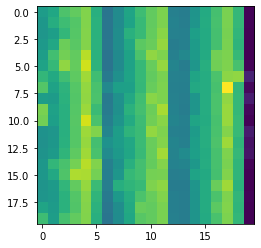

In [23]:
# Load to double check / compare
fo = pd.read_csv("./results/data/force/" + "2020-06-19-02-13-00-409961_ecto" + ".csv")
fo = fo.values.reshape(-1, 20, 20)
plt.imshow(fo[1150])

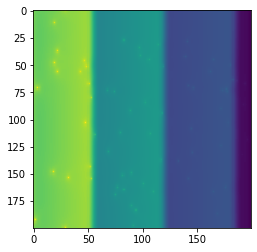

In [62]:
plt.imshow(fo_ecto[6, :, :])
plt.show()

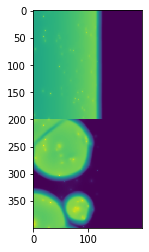

In [64]:
plt.imshow(calcium[2, :, :])
plt.show()

In [59]:
calcium.shape

(3000, 400, 200)